In [1]:
#legendre magic polys test

In [1]:
import numpy
import scipy
import scipy.special
import scipy.optimize
from matplotlib import pyplot
from mpl_toolkits.basemap import Basemap
import sys
%matplotlib nbagg

pi = scipy.pi

In [2]:
import scha
import importlib
importlib.reload(scha)

<module 'scha' from '/home/josecper/Programs/python/scha.py'>

In [3]:
ms = numpy.arange(0,9)

In [4]:
roots = scha.degree(ms, numpy.deg2rad(50), max_k=8)

<IPython.core.display.Javascript object>


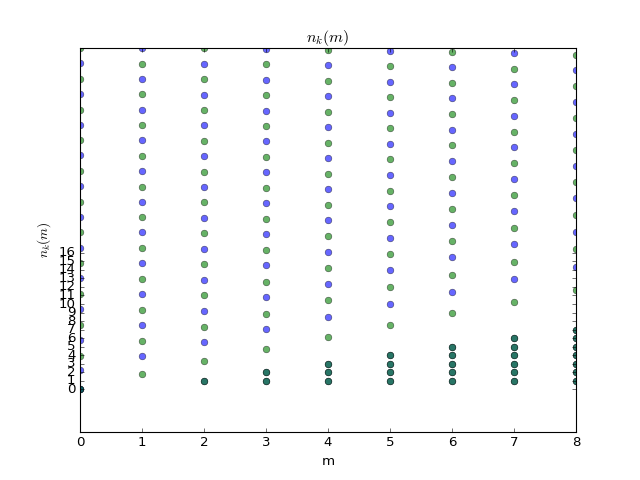

In [252]:
fig, ax = pyplot.subplots()

for m, (odds, evens) in enumerate(roots):
    ax.plot(numpy.ones_like(odds)*m, odds, marker="o", linestyle="None", color="blue", alpha=0.6)
    ax.plot(numpy.ones_like(evens)*m, evens, marker="o", linestyle="None", color="green", alpha=0.6)
    
ax.set_xlabel("m")
ax.set_ylabel("$n_{k}(m)$")
ax.set_yticks(numpy.arange(17))
ax.set_title("$n_{k}(m)$")
    

Grafica molona.
    - puntos azules = impares, cumplen P(theta0) = 0
    - puntos verdes = pares, cumplen dP/dtheta(theta0) = 0
    - cuando k >= m, n_k(m) = k

In [6]:
ms

array([0, 1, 2, 3, 4, 5, 6])

In [7]:
roots[0][1]

array([  1.04083409e-17,   3.92070429e+00,   7.55564799e+00,
         1.11692379e+01,   1.47764585e+01])

In [24]:
scha.schmidt_real(m, roots[0][1])

array([             inf,   2.00635904e-03,   2.02869655e-06,
         1.75683551e-07,   3.23121729e-08,   8.74385081e-09,
         3.00606713e-09,   1.21767591e-09])

In [254]:
scipy.special.lpmv(0,2.24,0.1)*scha.schmidt_real(0, 2.24)

-0.47715353354568507

In [5]:
n = numpy.linspace(0, 150, 15000)
theta0 = numpy.deg2rad(30)

In [6]:
p=scipy.special.lpmv(0, n, numpy.cos(theta0))

<IPython.core.display.Javascript object>


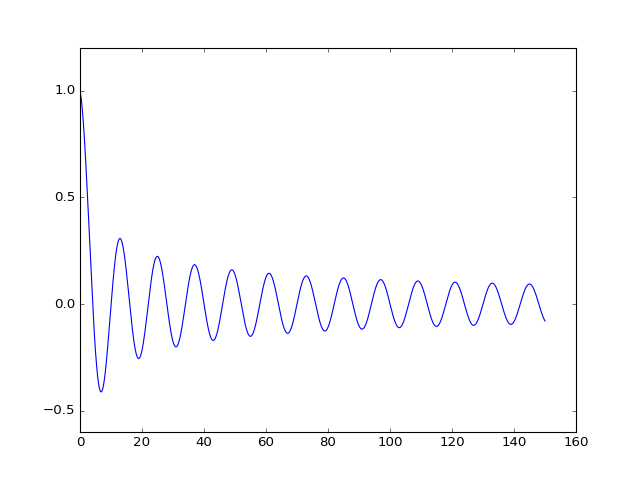

In [7]:
pyplot.plot(n, p); pyplot.show()

In [6]:
ms = numpy.arange(0, 13)
roots = scha.degree(ms, numpy.deg2rad(40), max_k=12)
k, m, n = scha.join_roots(roots)

<IPython.core.display.Javascript object>


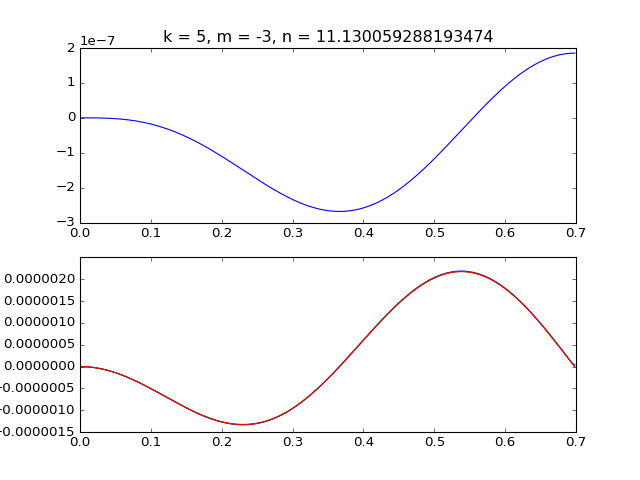

In [30]:
theta = numpy.linspace(0, numpy.deg2rad(40), 200)

i = 31

p = scipy.special.lpmv(m[i], n[i], numpy.cos(theta))
pnorm = scha.schmidt_real(m[i], n[i], grid=False)*p
pnm1 = scipy.special.lpmv(m[i], n[i]-1, numpy.cos(theta))
pnm1norm = scha.schmidt_real(m[i], n[i]-1, grid=False)*pnm1

z = numpy.cos(theta)
dd = numpy.gradient(pnorm)*200/numpy.deg2rad(40)
dt = 1/(z**2 - 1)*(n[i]*z*p -(n[i]+m[i])*pnm1)*(-numpy.sin(theta))*scha.schmidt_real(m[i], n[i], grid=False)
dtt = scha.dlpmv(m[i], n[i], z)*(-numpy.sin(theta))*scha.schmidt_real(m[i],n[i], grid=False)

fig, (ax1, ax2) = pyplot.subplots(2, 1)
ax1.plot(theta, pnorm)
ax2.plot(theta, dd)
ax2.plot(theta, dt)
ax2.plot(theta, dtt)
ax1.set_title("k = {0}, m = {1}, n = {2}".format(k[i], m[i], n[i]))
pyplot.show(fig)

In [415]:
g = numpy.zeros_like(k); g[9] = 1.0

theta, phi = numpy.meshgrid(numpy.linspace(0, numpy.deg2rad(40), 200)
                            ,numpy.linspace(0, numpy.pi*2, 200), indexing="ij")t

xxx = scha.xyzfield(k, m, n, g, theta, phi)[0]

<IPython.core.display.Javascript object>


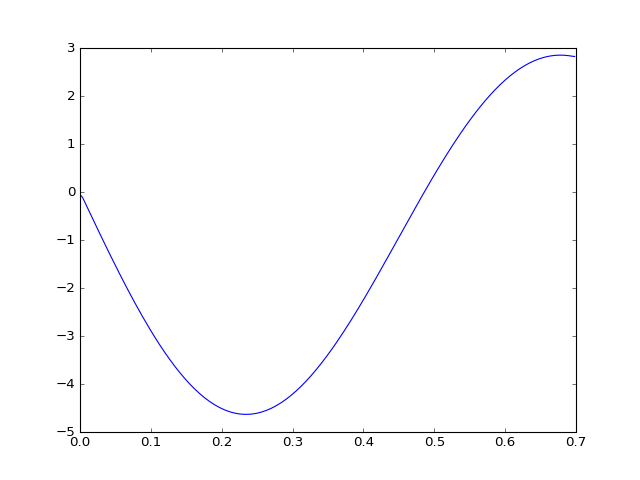

In [403]:
fig, ax = pyplot.subplots()
ax.plot(theta, xxx); pyplot.show(fig)

In [101]:
roots[1][1][2]

7.176981524890512

***schmidt*** __OK__

In [228]:
roots = scha.degree(numpy.arange(0, 7), numpy.deg2rad(40), max_k=6)
k, m, n = scha.join_roots(roots)
sch = scha.schmidt_real(m, n, grid=False)

In [260]:
print("{:>10}{:>10}        {:>9}         {:>9}".format("k", "m", "n(k)", "norm"))
print("------------------------------------------------------------------------")

for ki, mi, ni, si in zip(k, m, n, sch):
    print("{:>10}{:>10}        {:12.7f}        {:+11.6e}".format(ki, mi, ni, si))

         k         m             n(k)              norm
------------------------------------------------------------------------
         0         0           0.0000000        +1.000000e+00
         1         0           2.9322760        +1.000000e+00
         1         1           2.2753965        -5.180295e-01
         1        -1           2.2753965        -3.860784e+00
         2         0           5.0120050        +1.000000e+00
         2         1           5.0120050        -2.576319e-01
         2        -1           5.0120050        -7.763015e+00
         2         2           4.0904690        +7.143515e-02
         2        -2           4.0904690        +2.799742e+01
         3         0           7.4014910        +1.000000e+00
         3         1           7.1769815        -1.846067e-01
         3        -1           7.1769815        -1.083384e+01
         3         2           6.9441946        +2.611331e-02
         3        -2           6.9441946        +7.658928e+01
   

In [182]:
gcoefs = numpy.zeros_like(n)
gcoefs[:9] = 10**(6-numpy.array(k[:9]))

In [183]:
thetav, phiv = numpy.meshgrid(numpy.linspace(0.01, numpy.deg2rad(40), 100), numpy.linspace(0., 2*numpy.pi, 100), indexing="ij")
thetav, phiv = thetav.flatten(), phiv.flatten()

In [194]:
x, y, z = scha.xyzfield(k, m, n, gcoefs, thetav, phiv)

<IPython.core.display.Javascript object>


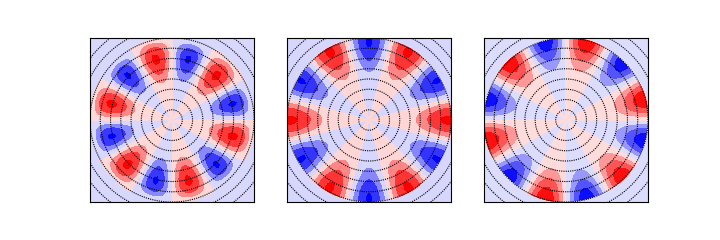

In [220]:
fig, axes = pyplot.subplots(1, 3, figsize=(9, 3))
base = Basemap(projection="npaeqd", lon_0 = 0, boundinglat=90-40)

for ax in axes:
    base.drawparallels(numpy.arange(40, 90, 5), ax=ax)
    
resolution = 500

phinew=scipy.linspace(min(phiv), max(phiv), resolution)
thetanew=scipy.linspace(0.01, numpy.pi-0.01, resolution)

thetagrid, phigrid = scipy.meshgrid(thetanew,phinew,indexing="xy")

xx=scipy.interpolate.griddata((thetav,phiv), x, (thetagrid,phigrid), method="linear")
yy=scipy.interpolate.griddata((thetav,phiv), y, (thetagrid,phigrid), method="linear")
zz=scipy.interpolate.griddata((thetav,phiv), z, (thetagrid,phigrid), method="linear")

xx[numpy.isnan(xx)] = 0.0
yy[numpy.isnan(yy)] = 0.0
zz[numpy.isnan(zz)] = 0.0

lon = numpy.rad2deg(phigrid)
lat = 90 - numpy.rad2deg(thetagrid)

base.contourf(lon, lat, xx, latlon=True, ax=axes[0], cmap="bwr", vmin=-max(abs(x)), vmax=max(abs(x)))
base.contourf(lon, lat, yy, latlon=True, ax=axes[1], cmap="bwr", vmin=-max(abs(y)), vmax=max(abs(y)))
base.contourf(lon, lat, zz, latlon=True, ax=axes[2], cmap="bwr", vmin=-max(abs(z)), vmax=max(abs(z)))

In [153]:
k[1]

1

In [181]:
k[:9]

[0, 1, 1, 1, 2, 2, 2, 2, 2]

In [245]:
def polar_contour(scalar, thetav, phiv, theta0, ax, base=None):
    
    lat0 = numpy.rad2deg(theta0)
    
    if base is None:
        base = Basemap(projection="npaeqd", lon_0 = 0, boundinglat=90-lat0)

    base.drawparallels(numpy.arange(90-lat0, 90, 5), ax=ax)
    
    resolution = 100

    phinew=scipy.linspace(min(phiv), max(phiv), resolution)
    thetanew=scipy.linspace(0.01, numpy.pi-0.01, resolution)

    thetagrid, phigrid = scipy.meshgrid(thetanew,phinew,indexing="xy")

    xx=scipy.interpolate.griddata((thetav,phiv), scalar, (thetagrid,phigrid), method="linear")
    xx[numpy.isnan(xx)] = 0.0

    lon = numpy.rad2deg(phigrid)
    lat = 90 - numpy.rad2deg(thetagrid)

    base.contourf(lon, lat, xx, 40, latlon=True, ax=ax, cmap="bwr",
                  vmin=-max(abs(xx))*1.1, vmax=max(abs(xx))*1.1)

<IPython.core.display.Javascript object>


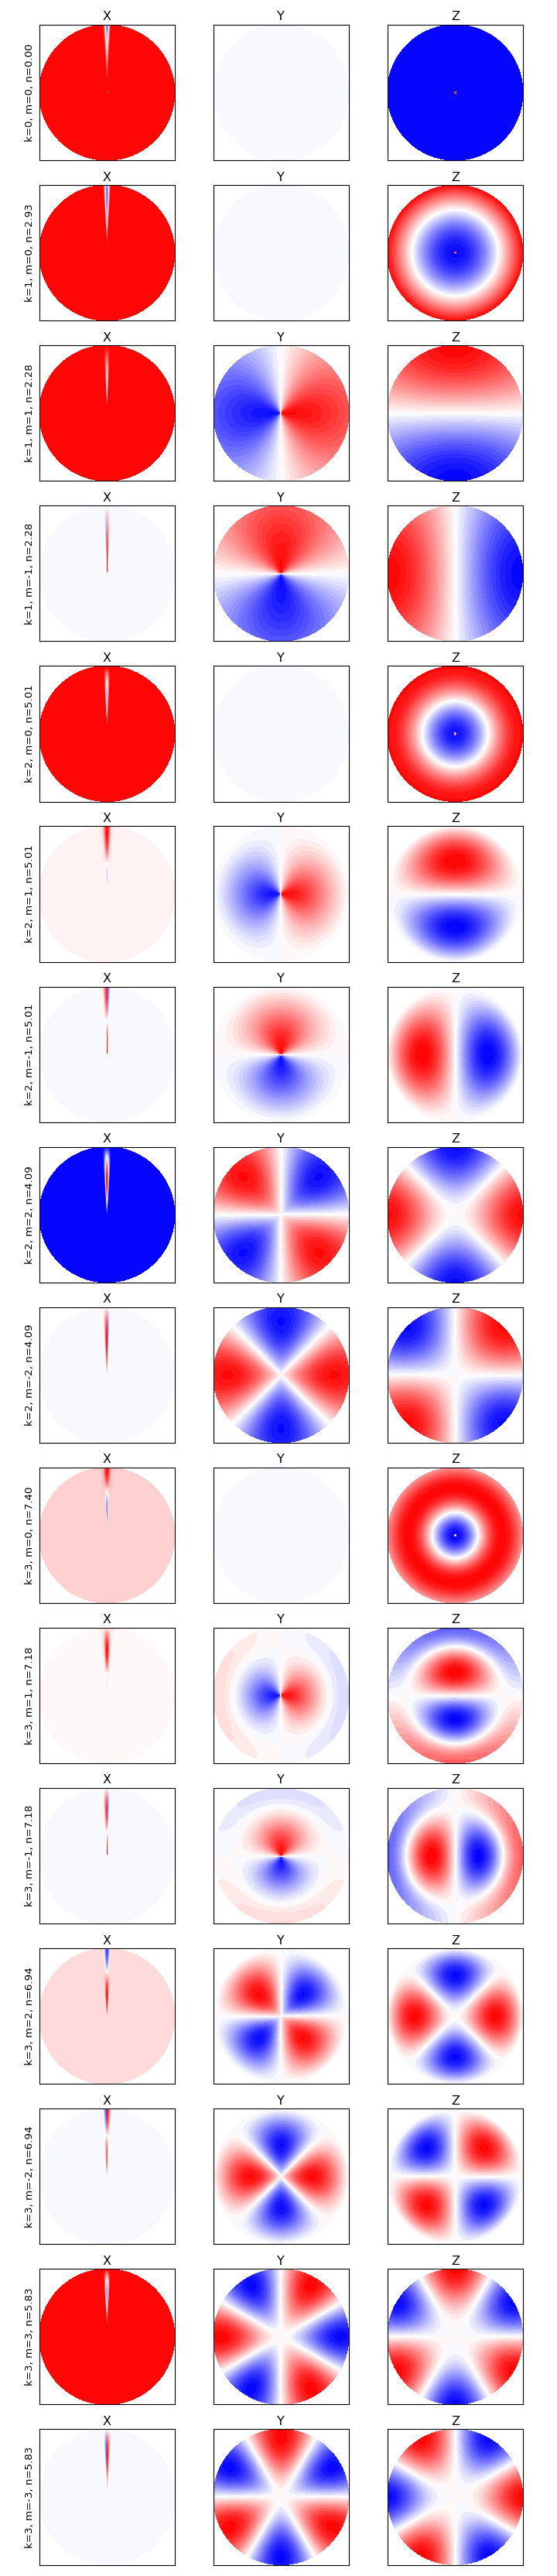

In [407]:
roots = scha.degree(numpy.arange(0, 4), numpy.deg2rad(40), max_k=3)
k, m, n = scha.join_roots(roots)

thetav, phiv = numpy.meshgrid(numpy.linspace(0.01, numpy.deg2rad(40), 100),
                              numpy.linspace(-numpy.pi, numpy.pi, 100),
                              indexing="ij")

thetav, phiv = thetav.flatten(), phiv.flatten()

fig, axes = pyplot.subplots(len(k), 3, figsize=(9, 2.6*len(k)))

for i, (ki, mi, ni) in enumerate(zip(k,m,n)):
    gcoefs = numpy.zeros_like(k)
    gcoefs[i] = 1.0
    x, y, z = scha.xyzfield(k, m, n, gcoefs, thetav, phiv)
    scha.polar_contour(x, thetav, phiv, numpy.deg2rad(40), ax=axes[i][0])
    scha.polar_contour(y, thetav, phiv, numpy.deg2rad(40), ax=axes[i][1])
    scha.polar_contour(z, thetav, phiv, numpy.deg2rad(40), ax=axes[i][2])
    axes[i][0].set_ylabel("k={0}, m={1}, n={2:4.2f}".format(ki, mi, ni))
    axes[i][0].set_title("X")
    axes[i][1].set_title("Y")
    axes[i][2].set_title("Z")    
    sys.stdout.write("\r{0} out of {1}".format(i, len(k)))

sys.stdout.write("\r")
fig.tight_layout()
    

In [213]:
axes[0][0]

In [368]:
x

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])